In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
enddate = dt.datetime.now()
startdate = enddate - dt.timedelta(days = 365*5)
enddate, startdate
stocks = ['KO']
df = yf.download(stocks, start = startdate, end = enddate)
df.head() 

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2021-01-25,41.967766,42.019388,41.503180,41.658040,16604200
2021-01-26,42.406551,42.501190,41.821514,42.079618,12922600
2021-01-27,41.752686,42.432361,41.494582,42.062411,21242400
2021-01-28,42.286102,42.587223,41.821514,41.890340,17498900
2021-01-29,41.425758,42.260294,41.391344,42.182862,18670300


In [4]:
df = yf.download(stocks, start=startdate, end=enddate, auto_adjust=False) #-------- Force yfinance to only show Adj Close
adj_close_prices = df['Adj Close']
adj_close_prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,KO
Date,
2021-01-25,41.967773
2021-01-26,42.406551
2021-01-27,41.752686
2021-01-28,42.286106
2021-01-29,41.425758


In [5]:
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()

Ticker,KO
Date,
2021-01-25,NaN
2021-01-26,0.010401
2021-01-27,-0.015539
2021-01-28,0.012695
2021-01-29,-0.020556


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

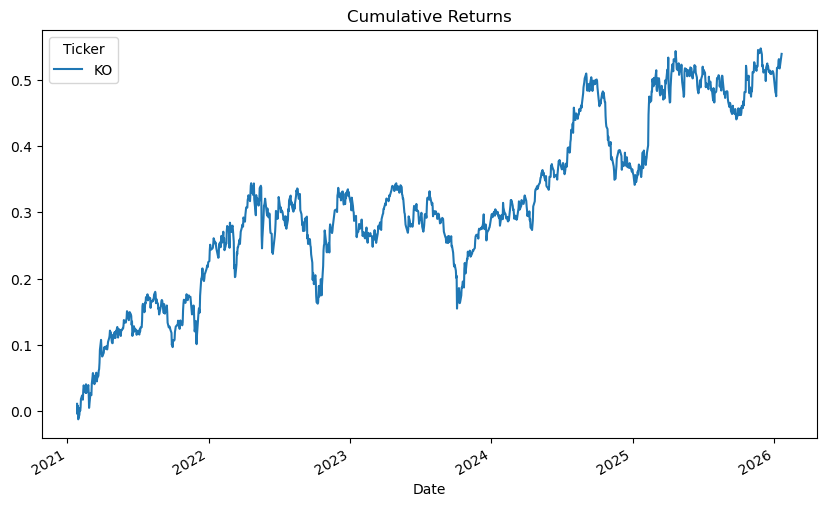

In [6]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))